# Wind Data Compared to Temperature Fluctuations

In [1]:
# Standard imports

import datetime
import urllib.parse
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import requests

import openmeteo_requests

import requests_cache
from retry_requests import retry

%matplotlib inline

## Project Notes

Overall idea: Collect data over a big enough time to allow data to show the difference between a time of climate disruption and a time where there was less climate disruption.  The project compares wind data to variations in temperature data.

Three questions:
1. Does wind speed change when temperatures are more variable
2. Does wind direction on average change when temperatures are more variable
3. Is the variation greater at any specific latitudes

## Project Data

Data source: Open-Meteo (https://open-meteo.com/). Generated using Copernicus Climate Change Service information (2022). ERA5 data: Hersbach et al. (2018), doi: 10.24381/cds.adbb2d47. ERA5-Land data: Muñoz Sabater (2019), doi: 10.24381/cds.e2161bac. CERRA data: Schimanke et al. (accessed 2022-12-31), doi: 10.24381/cds.622a565a.

Cities:
- Svalbard, Norway, (Artic)
- Reykjavik, Iceland (Subarctic)
- Oslo, Norway (Temperate)
- New York City, USA (Temperate)
- Lisbon, Portugal (Mediterranean)
- Cape Town, South Africa (Mediterranean/Subtropical)
- Dubai, United Arab Emirates (Subtropical Desert)
- Mumbai, India (Tropical)
- Singapore (Tropical Rainforest)
- Rio de Janeiro, Brazil (Tropical)
- Sydney, Australia (Temperate)
- Ushuaia, Argentina (Subpolar Oceanic)



In [2]:
endpoint = "https://archive-api.open-meteo.com/v1/archive"
time_span = 365*2

# Datetime format: YYYY-MM-DD
start_date = "2024-02-09"
yesterday = datetime.datetime.now() - datetime.timedelta(days=2)
start_date_obj = yesterday - datetime.timedelta(days=time_span)

end_date = f"{yesterday:%Y-%m-%d}"
start_date = f"{start_date_obj:%Y-%m-%d}"

hourly_params = ["temperature_2m", "wind_speed_10m", "wind_speed_100m", "wind_direction_10m", "wind_direction_100m"]


location_data = [
    {
        'name': 'Svalbard',
        'country': 'Norway',
        'latitude_description': 'Artic',
        'params': {
        	"latitude": "78.2461",
        	"longitude": "15.4656",
        	"start_date": start_date,
        	"end_date": end_date,
        	"hourly": hourly_params
        }
    },
    {
        'name': 'Reykjavik',
        'country': 'Iceland',
        'latitude_description': 'Subarctic',
        'params': {
        	"latitude": "64.13",
        	"longitude": "-21.9406",
        	"start_date": start_date,
        	"end_date": end_date,
        	"hourly": hourly_params
        }
    },
    {
        'name': 'Oslo',
        'country': 'Norway',
        'latitude_description': 'Temperate',
        'params': {
        	"latitude": "59.9127",
        	"longitude": "10.7461",
        	"start_date": start_date,
        	"end_date": end_date,
        	"hourly": hourly_params
        }
    },
    {
        'name': 'New York City',
        'country': 'USA',
        'latitude_description': 'Temperate',
        'params': {
        	"latitude": "40.7143",
        	"longitude": "-74.006",
        	"start_date": start_date,
        	"end_date": end_date,
        	"hourly": hourly_params
        }
    },
    {
        'name': 'Lisbon',
        'country': 'Portugal',
        'latitude_description': 'Mediterranean',
        'params': {
        	"latitude": "38.7167",
        	"longitude": "-9.1333",
        	"start_date": start_date,
        	"end_date": end_date,
        	"hourly": hourly_params
        }
    },
    {
        'name': 'Cape Town',
        'country': 'South Africa',
        'latitude_description': 'Mediterranean/Subtropical',
        'params': {
        	"latitude": "-33.9258",
        	"longitude": "18.4232",
        	"start_date": start_date,
        	"end_date": end_date,
        	"hourly": hourly_params
        }
    },
    {
        'name': 'Dubai',
        'country': 'United Arab Emirates',
        'latitude_description': 'Subtropical Desert',
        'params': {
        	"latitude": "25.0772",
        	"longitude": "55.3093",
        	"start_date": start_date,
        	"end_date": end_date,
        	"hourly": hourly_params
        }
    },
    {
        'name': 'Mumbai',
        'country': 'India',
        'latitude_description': 'Tropical',
        'params': {
        	"latitude": "19.0728",
        	"longitude": "72.8826",
        	"start_date": start_date,
        	"end_date": end_date,
        	"hourly": hourly_params
        }
    },
    {
        'name': 'Singapore',
        'country': 'Singapore',
        'latitude_description': 'Tropical Rainforest',
        'params': {
        	"latitude": "1.2897",
        	"longitude": "103.8501",
        	"start_date": start_date,
        	"end_date": end_date,
        	"hourly": hourly_params
        }
    },
    {
        'name': 'Rio de Janeiro',
        'country': 'Brazil',
        'latitude_description': 'Tropical',
        'params': {
        	"latitude": "-22.9064",
        	"longitude": "-43.1822",
        	"start_date": start_date,
        	"end_date": end_date,
        	"hourly": hourly_params
        }
    },
    {
        'name': 'Sydney',
        'country': 'Australia',
        'latitude_description': 'Temperate',
        'params': {
        	"latitude": "-33.8678",
        	"longitude": "151.2073",
        	"start_date": start_date,
        	"end_date": end_date,
        	"hourly": hourly_params
        }
    },
    {
        'name': 'Ushuaia',
        'country': 'Argentina',
        'latitude_description': 'Subpolar Oceanic',
        'params': {
        	"latitude": "-54.8108",
        	"longitude": "-68.3159",
        	"start_date": start_date,
        	"end_date": end_date,
        	"hourly": hourly_params
        }
    }
]


In [3]:
# TODO: THIS IS JUST FOR AN EXAMPLE, FROM THE WEBSITE.

import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 78.2461,
	"longitude": 15.4656,
	"start_date": "2024-02-09",
	"end_date": "2024-02-23",
	"hourly": ["temperature_2m", "wind_speed_10m", "wind_speed_100m", "wind_direction_10m", "wind_direction_100m"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(1).ValuesAsNumpy()
hourly_wind_speed_100m = hourly.Variables(2).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(3).ValuesAsNumpy()
hourly_wind_direction_100m = hourly.Variables(4).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_direction_100m"] = hourly_wind_direction_100m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

Coordinates 78.27767944335938°N 15.789474487304688°E
Elevation 25.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                         date  temperature_2m  wind_speed_10m  \
0   2024-02-09 00:00:00+00:00        -15.9505        9.000000   
1   2024-02-09 01:00:00+00:00        -13.9505        8.707237   
2   2024-02-09 02:00:00+00:00        -12.6505        9.227524   
3   2024-02-09 03:00:00+00:00        -11.9505        9.000000   
4   2024-02-09 04:00:00+00:00        -12.4005        7.862518   
..                        ...             ...             ...   
355 2024-02-23 19:00:00+00:00         -6.5505       12.324414   
356 2024-02-23 20:00:00+00:00         -5.7505       13.627795   
357 2024-02-23 21:00:00+00:00         -5.7005       12.101570   
358 2024-02-23 22:00:00+00:00         -5.8005       10.948973   
359 2024-02-23 23:00:00+00:00         -5.8005       11.298495   

     wind_speed_100m  wind_direction_10m  wind_direction_100m  
0          14.973576         

In [4]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)


In [5]:
# Get the response


# ['name', 'country', 'latitude_description', 'params', 'data']
# ['hourly_temperature_2m', 'hourly_wind_speed_10m', 'hourly_wind_speed_100m', 'hourly_wind_direction_10m', 'hourly_wind_direction_100m']

for location in location_data:
    location['data'] = {}
    responses = openmeteo.weather_api(endpoint, params=location['params'])
    response = responses[0]
    
    # Process hourly data. The order of variables needs to be the same as requested.
    hourly = response.Hourly()
    hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
    hourly_wind_speed_10m = hourly.Variables(1).ValuesAsNumpy()
    hourly_wind_speed_100m = hourly.Variables(2).ValuesAsNumpy()
    hourly_wind_direction_10m = hourly.Variables(3).ValuesAsNumpy()
    hourly_wind_direction_100m = hourly.Variables(4).ValuesAsNumpy()
    
    hourly_data = {"date": pd.date_range(
    	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
    	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
    	freq = pd.Timedelta(seconds = hourly.Interval()),
    	inclusive = "left"
    )}
    hourly_data["temperature_2m"] = hourly_temperature_2m
    hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
    hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
    hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
    hourly_data["wind_direction_100m"] = hourly_wind_direction_100m
    
    location['hourly_dataframe'] = pd.DataFrame(data = hourly_data)


# TODO

Graphs -> 
1. simple graph -> x -> temp, windspeed -> y (scatter plot) -> all the data on one graph.
2. All cities on one graph, with different colours for different cities. (scatter plot).  Also play around, such as varying lat locations.

Questions ->
1. Does wind speed change when temperatures are more variable.  Use graphs to define the variables.
    a. What is the threshold for windspeed change (time, is it a day, or is it longer, temparature, what is baseline, what threshold).  Do some background reading.  What are thresholds others have used.  What are their reasons.

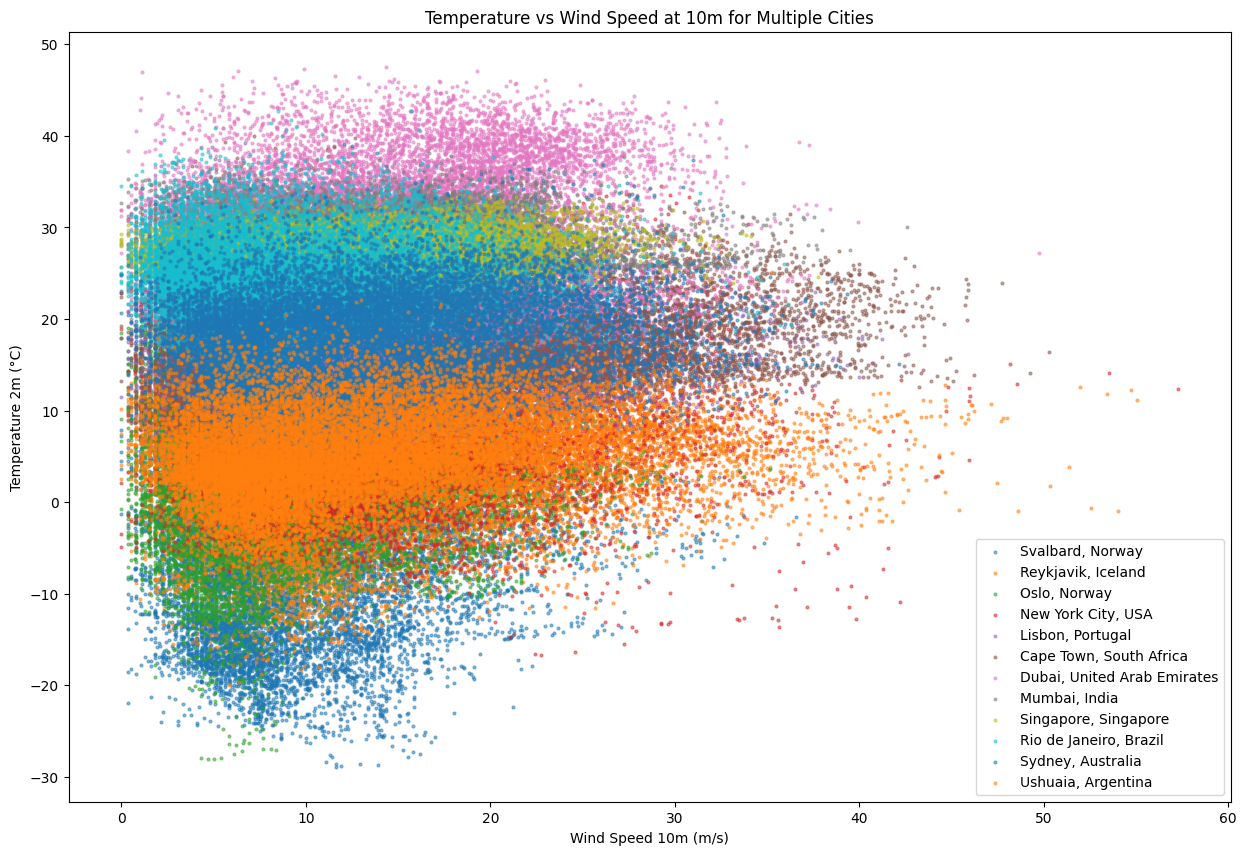

In [6]:
def create_scatter_plot(location_data, x_key, y_key, x_label, y_label, title):
    plt.figure(figsize=(15, 10))
    
    for location in location_data:
        city_name = location['name']
        country = location['country']
        df = location['hourly_dataframe']  # Access the DataFrame directly
        
        plt.scatter(df[x_key], df[y_key], s=4, alpha=0.5, label=f"{city_name}, {country}")
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()


create_scatter_plot(
    location_data, 
    'wind_speed_10m', 
    'temperature_2m', 
    'Wind Speed 10m (m/s)', 
    'Temperature 2m (°C)', 
    'Temperature vs Wind Speed at 10m for Multiple Cities')

In [7]:
location_data[3]['hourly_dataframe'].head(3)


,date,temperature_2m,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m
0,2022-03-16 00:00:00+00:00,9.7225,10.041354,26.576681,194.534500,208.300659
1,2022-03-16 01:00:00+00:00,12.2725,10.538843,26.368616,262.146790,255.774002
2,2022-03-16 02:00:00+00:00,12.9225,12.224107,25.570139,283.627014,271.613495


In [8]:
location_data[3]['hourly_dataframe'].tail(3)

,date,temperature_2m,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m
17541,2024-03-15 21:00:00+00:00,18.122499,23.233252,32.449959,310.601196,310.049652
17542,2024-03-15 22:00:00+00:00,16.422499,17.339897,27.804029,318.366547,318.674591
17543,2024-03-15 23:00:00+00:00,14.322500,15.530151,30.421598,315.939087,320.281281


In [9]:
location_data[3]['hourly_dataframe'].sample(15)

,date,temperature_2m,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m
5452,2022-10-29 04:00:00+00:00,7.722500,8.280000,19.386593,360.000000,21.801476
5776,2022-11-11 16:00:00+00:00,17.472500,6.915374,15.111424,128.659836,167.619247
7256,2023-01-12 08:00:00+00:00,-0.077500,9.693296,22.331610,68.198532,88.152428
5598,2022-11-04 06:00:00+00:00,8.822500,8.640000,12.287555,270.000000,238.172592
8410,2023-03-01 10:00:00+00:00,-2.527500,10.137691,24.216522,353.884583,354.882782
13421,2023-09-26 05:00:00+00:00,14.422500,19.734436,32.329922,38.333389,44.548916
3677,2022-08-16 05:00:00+00:00,19.372499,6.369050,12.101570,42.709366,59.620956
6653,2022-12-18 05:00:00+00:00,0.122500,10.594036,24.503809,260.217651,259.845795
8808,2023-03-18 00:00:00+00:00,9.672500,12.240000,28.008369,208.072388,217.164551
3541,2022-08-10 13:00:00+00:00,25.022499,11.620809,14.689589,16.189287,17.102825


In [10]:
print(f"Shape (rows, columns):\n\t{location_data[3]['hourly_dataframe'].shape}\n")
print(f"Size (Total number of elements):\n\t{location_data[3]['hourly_dataframe'].size}\n")
print(f"Data Types:\n{location_data[3]['hourly_dataframe'].dtypes}")

Shape (rows, columns):
	(17544, 6)

Size (Total number of elements):
	105264

Data Types:
date                   datetime64[ns, UTC]
temperature_2m                     float32
wind_speed_10m                     float32
wind_speed_100m                    float32
wind_direction_10m                 float32
wind_direction_100m                float32
dtype: object


In [11]:
location_data[3]['hourly_dataframe'].describe()

,temperature_2m,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m
count,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,12.729807,13.280745,21.759995,206.899307,205.932083
std,9.261863,6.856552,10.103935,103.938095,103.278923
min,-16.727501,0.000000,0.000000,0.596799,0.489688
25%,5.272500,8.049845,14.512064,136.847595,132.972626
50%,12.472500,11.966954,21.203358,228.814178,227.412773
75%,20.372499,17.377226,27.943514,295.346130,293.749512
max,37.322498,57.295441,89.312653,360.000000,360.000000


In [12]:
location_data[3]['hourly_dataframe'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   date                 17544 non-null  datetime64[ns, UTC]
 1   temperature_2m       17544 non-null  float32            
 2   wind_speed_10m       17544 non-null  float32            
 3   wind_speed_100m      17544 non-null  float32            
 4   wind_direction_10m   17544 non-null  float32            
 5   wind_direction_100m  17544 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5)
memory usage: 479.8 KB


In [13]:
for location in location_data:
    print(f"{location['name']}:\n{location['hourly_dataframe'].isnull().sum()}\n")
    

Svalbard:
date                   0
temperature_2m         0
wind_speed_10m         0
wind_speed_100m        0
wind_direction_10m     0
wind_direction_100m    0
dtype: int64

Reykjavik:
date                   0
temperature_2m         0
wind_speed_10m         0
wind_speed_100m        0
wind_direction_10m     0
wind_direction_100m    0
dtype: int64

Oslo:
date                   0
temperature_2m         0
wind_speed_10m         0
wind_speed_100m        0
wind_direction_10m     0
wind_direction_100m    0
dtype: int64

New York City:
date                   0
temperature_2m         0
wind_speed_10m         0
wind_speed_100m        0
wind_direction_10m     0
wind_direction_100m    0
dtype: int64

Lisbon:
date                   0
temperature_2m         0
wind_speed_10m         0
wind_speed_100m        0
wind_direction_10m     0
wind_direction_100m    0
dtype: int64

Cape Town:
date                   0
temperature_2m         0
wind_speed_10m         0
wind_speed_100m        0
wind_direction_10m 

In [14]:
location_data[3]['hourly_dataframe'].set_index('date', inplace=True)

In [15]:
daily_avg = location_data[3]['hourly_dataframe'].resample('D').mean()[['temperature_2m', 'wind_speed_10m']]
daily_avg.head()

,temperature_2m,wind_speed_10m
date,,
2022-03-16 00:00:00+00:00,10.374583,10.629552
2022-03-17 00:00:00+00:00,7.330833,11.934189
2022-03-18 00:00:00+00:00,12.014167,8.053243
2022-03-19 00:00:00+00:00,11.618333,13.103345
2022-03-20 00:00:00+00:00,11.978749,16.055265


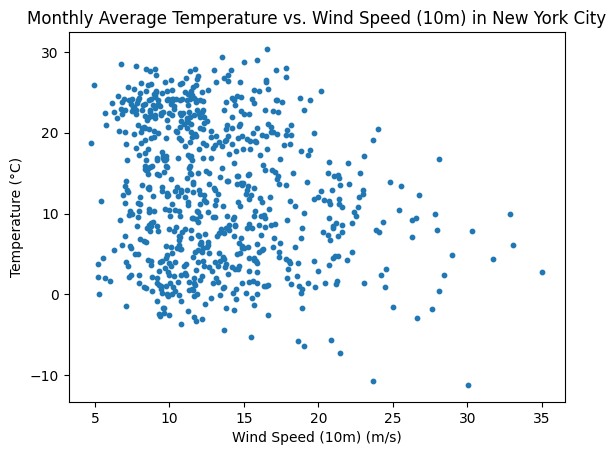

In [16]:
plt.scatter(daily_avg['wind_speed_10m'], daily_avg['temperature_2m'], s=10)
plt.title(f"Monthly Average Temperature vs. Wind Speed (10m) in {location_data[3]['name']}")
plt.xlabel('Wind Speed (10m) (m/s)')
plt.ylabel('Temperature (°C)')
plt.show()

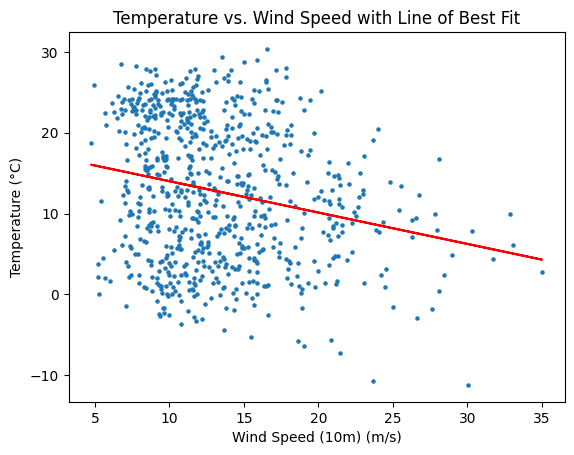

In [17]:
x = daily_avg['wind_speed_10m']
y = daily_avg['temperature_2m']

# Calculate the line of best fit
m, b = np.polyfit(x, y, 1)  # m = slope, b = intercept

# Add the line of best fit over the scatter plot
plt.scatter(x, y, s=5)  # Scatter plot of your data
plt.plot(x, m*x + b, color='red')  # Line of best fit

plt.title('Temperature vs. Wind Speed with Line of Best Fit')
plt.xlabel('Wind Speed (10m) (m/s)')
plt.ylabel('Temperature (°C)')
plt.show()

In [18]:
weekly_avg = location_data[3]['hourly_dataframe'].resample('W').mean()[['temperature_2m', 'wind_speed_10m']]
weekly_avg.head()

,temperature_2m,wind_speed_10m
date,,
2022-03-20 00:00:00+00:00,10.663333,11.955119
2022-03-27 00:00:00+00:00,7.540060,17.427574
2022-04-03 00:00:00+00:00,4.669226,18.810760
2022-04-10 00:00:00+00:00,8.444821,17.134348
2022-04-17 00:00:00+00:00,12.607322,15.426903


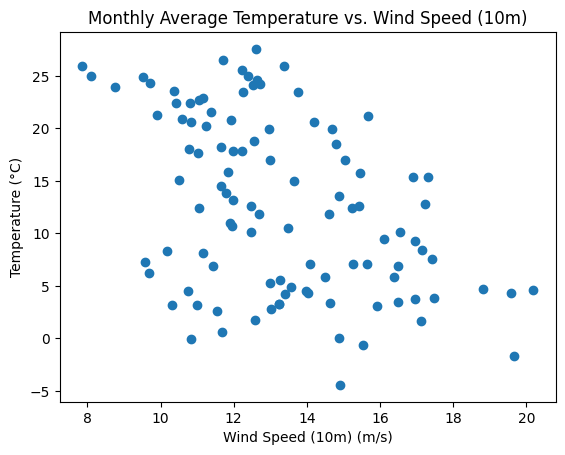

In [19]:
plt.scatter(weekly_avg['wind_speed_10m'], weekly_avg['temperature_2m'])
plt.title('Monthly Average Temperature vs. Wind Speed (10m)')
plt.xlabel('Wind Speed (10m) (m/s)')
plt.ylabel('Temperature (°C)')
plt.show()

In [20]:
monthly_avg = location_data[3]['hourly_dataframe'].resample('ME').mean()[['temperature_2m', 'wind_speed_10m']]
monthly_avg.head()

,temperature_2m,wind_speed_10m
date,,
2022-03-31 00:00:00+00:00,7.165989,16.537611
2022-04-30 00:00:00+00:00,9.882986,16.699606
2022-05-31 00:00:00+00:00,16.243937,13.092832
2022-06-30 00:00:00+00:00,20.990276,13.081755
2022-07-31 00:00:00+00:00,25.514971,12.527518


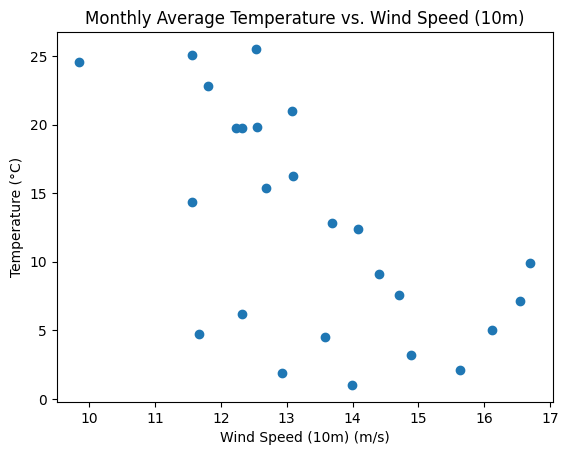

In [21]:
plt.scatter(monthly_avg['wind_speed_10m'], monthly_avg['temperature_2m'])
plt.title('Monthly Average Temperature vs. Wind Speed (10m)')
plt.xlabel('Wind Speed (10m) (m/s)')
plt.ylabel('Temperature (°C)')
plt.show()

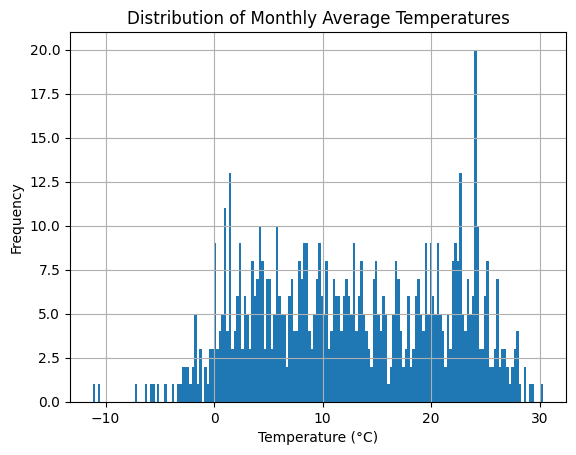

In [22]:
daily_avg['temperature_2m'].hist(bins=365//2)
plt.title('Distribution of Monthly Average Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

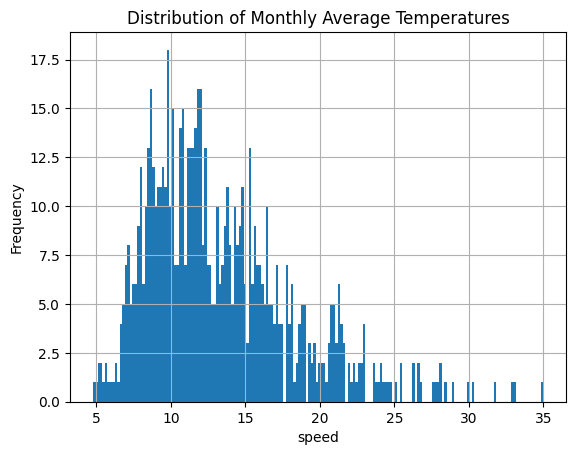

In [23]:
daily_avg['wind_speed_10m'].hist(bins=365//2)
plt.title('Distribution of Monthly Average Temperatures')
plt.xlabel('speed')
plt.ylabel('Frequency')
plt.show()

In [24]:
# TODO -> BUCKET WIND TO TEMP VARIATION